In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


X_train = pd.read_csv('Volcanoes_train/train_images.csv')
y_train = pd.read_csv('Volcanoes_train/train_labels.csv')
X_test = pd.read_csv('Volcanoes_test/test_images.csv')
y_test = pd.read_csv('Volcanoes_test/test_labels.csv')

In [4]:
X_train.head()

,95,101,99,103,95.1,86,96,89,70,104,...,111.214,107.329,92.354,89.258,103.379,99.414,117.112,116.103,118.82,96.423
0,91,92,91,89,92,93,96,101,107,104,...,103,92,93,95,98,105,104,100,90,81
1,87,70,72,74,84,78,93,104,106,106,...,84,71,95,102,94,80,91,80,84,90
2,0,0,0,0,0,0,0,0,0,0,...,94,81,89,84,80,90,92,80,88,96
3,114,118,124,119,95,118,105,116,123,112,...,116,113,102,93,109,104,106,117,111,115
4,79,95,90,82,73,74,77,75,82,87,...,90,80,79,78,65,71,62,97,89,73


In [5]:
y_train.head()

,Volcano?,Type,Radius,Number Volcanoes
0,1,3.0,17.46,1.0
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN


In [6]:
print("X_train ->",X_train.shape,"\ny_train ->",y_train.shape,"\nX_test ->",X_test.shape,"\ny_test ->",y_test.shape)

X_train -> (6999, 12100) 
y_train -> (7000, 4) 
X_test -> (2733, 12100) 
y_test -> (2734, 4)


In [7]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [8]:
print("X_train ->",X_train.shape,"\ny_train ->",y_train.shape,"\nX_test ->",X_test.shape,"\ny_test ->",y_test.shape)

X_train -> (7000, 12100) 
y_train -> (7000, 4) 
X_test -> (2734, 12100) 
y_test -> (2734, 4)


In [9]:
y_train_copy = y_train.copy()
X_train_copy = X_train.copy()

In [10]:
X_train_copy.shape

(7000, 12100)

In [11]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

In [12]:
print("After split train data for valitadion data.")
print("%70   X_train ->",X_train.shape,"\n      y_train ->",y_train.shape,"\n\n%15   X_test ->",X_test.shape,"\n      y_test ->",y_test.shape,"\n\n%15   X_val ->",X_val.shape,"\n      y_val ->",y_val.shape)

After split train data for valitadion data.
%70   X_train -> (7000, 12100) 
      y_train -> (7000, 4) 

%15   X_test -> (1367, 12100) 
      y_test -> (1367, 4) 

%15   X_val -> (1367, 12100) 
      y_val -> (1367, 4)


In [13]:
print("Before resize")
print("%70   X_train ->",X_train.shape,"\n      y_train ->",y_train.shape,"\n\n%15   X_test ->",X_test.shape,"\n      y_test ->",y_test.shape,"\n\n%15   X_val ->",X_val.shape,"\n      y_val ->",y_val.shape)

X_test = np.resize(X_test, (1367, 110, 110, 1))
X_train = np.resize(X_train, (7000, 110, 110, 1))
X_val = np.resize(X_val, (1367, 110, 110, 1))

print("\nAfter resize")
print("%70   X_train ->",X_train.shape,"\n      y_train ->",y_train.shape,"\n\n%15   X_test ->",X_test.shape,"\n      y_test ->",y_test.shape,"\n\n%15   X_val ->",X_val.shape,"\n      y_val ->",y_val.shape)

Before resize
%70   X_train -> (7000, 12100) 
      y_train -> (7000, 4) 

%15   X_test -> (1367, 12100) 
      y_test -> (1367, 4) 

%15   X_val -> (1367, 12100) 
      y_val -> (1367, 4)

After resize
%70   X_train -> (7000, 110, 110, 1) 
      y_train -> (7000, 4) 

%15   X_test -> (1367, 110, 110, 1) 
      y_test -> (1367, 4) 

%15   X_val -> (1367, 110, 110, 1) 
      y_val -> (1367, 4)


In [14]:
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]
y_val = y_val["Volcano?"]

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [16]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)

In [17]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam

modelA = Sequential()
modelA.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', input_shape = (110,110,1)))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Conv2D(filters = 16, kernel_size = (3,3), activation ='relu'))
modelA.add(MaxPool2D(pool_size=(2,2)))
modelA.add(Flatten())
modelA.add(Dense(y_train.shape[1], activation = "sigmoid"))

In [18]:
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 106, 8)       208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 53, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 51, 51, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 20002     
Total params: 21,378
Trainable params: 21,378
Non-trainable params: 0
____________________________________________________

In [19]:
modelA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
modelA_trained = modelA.fit(X_train, y_train, batch_size=64, epochs = 20, validation_data = (X_val,y_val))

Train on 7000 samples, validate on 1367 samples
Epoch 1/20
7000/7000 [==============================] - 4s 523us/sample - loss: 0.4149 - accuracy: 0.8571 - val_loss: 0.4208 - val_accuracy: 0.8464
Epoch 2/20
7000/7000 [==============================] - 1s 157us/sample - loss: 0.4031 - accuracy: 0.8571 - val_loss: 0.4165 - val_accuracy: 0.8464
Epoch 3/20
7000/7000 [==============================] - 1s 154us/sample - loss: 0.3881 - accuracy: 0.8571 - val_loss: 0.4081 - val_accuracy: 0.8464
Epoch 4/20
7000/7000 [==============================] - 1s 157us/sample - loss: 0.3662 - accuracy: 0.8571 - val_loss: 0.3621 - val_accuracy: 0.8464
Epoch 5/20
7000/7000 [==============================] - 1s 157us/sample - loss: 0.2981 - accuracy: 0.8571 - val_loss: 0.2713 - val_accuracy: 0.8464
Epoch 6/20
7000/7000 [==============================] - 1s 158us/sample - loss: 0.2497 - accuracy: 0.8571 - val_loss: 0.2620 - val_accuracy: 0.8464
Epoch 7/20
7000/7000 [==============================] - 1s 158us

In [21]:
def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex

In [22]:
print("There are "+str(len(corruptedImages(X_train_copy)))+" corrupted images in train set.")

There are 209 corrupted images in train set.


In [23]:
X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

In [24]:
from matplotlib import pyplot as plt

def draw_images(feature):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    f, ax = plt.subplots(len(featureTypes)*2, 5, figsize=(12,6*len(featureTypes)))
    for i in range(len(featureTypes)*2):
        typ = featureTypes[int(i/2)]
        sample = y_train_copy[y_train_copy[feature]==typ].sample(5)
        for j in range(5):
            imageIndex = sample.iloc[j].name
            image = X_train_copy[imageIndex]
            ax[i, j].imshow(image, resample=True)
            ax[i, j].set_title(typ, fontsize=13)
    plt.tight_layout()
    plt.show()

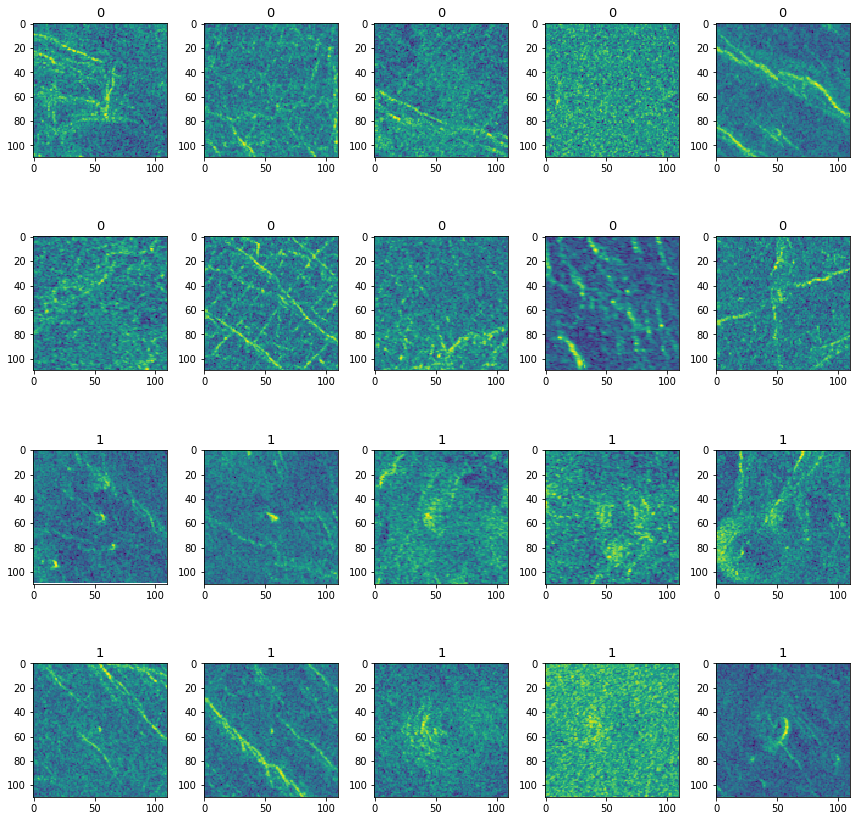

In [25]:
draw_images("Volcano?")

In [26]:
scoreA = modelA.evaluate(X_test, y_test)
print('Test Loss ->', scoreA[0])
print('Test Accuracy ->', scoreA[1])

1367/1367 [==============================] - 0s 177us/sample - loss: 0.1584 - accuracy: 0.9517
Test Loss -> 0.15835301406905
Test Accuracy -> 0.9517191


In [27]:
def corruptedImages(data):
    corruptedImagesIndex = []
    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image)):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0:
            corruptedImagesIndex.append(index)
        else:
            sum = 0

    for index, image in enumerate(np.resize(data, (data.shape[0], 12100))): # resize (7000, 110, 110, 1) to (7000,12100)
        sum = 0;
        for pixelIndex in range(0,len(image),110):
            sum += image[pixelIndex]
            if pixelIndex == 10:
                break
        if sum == 0 and index not in corruptedImagesIndex:
            corruptedImagesIndex.append(index)
        else:
            sum = 0
    return corruptedImagesIndex

In [28]:
print("There are "+str(len(corruptedImages(X_train_copy)))+" corrupted images in train set.")

There are 209 corrupted images in train set.


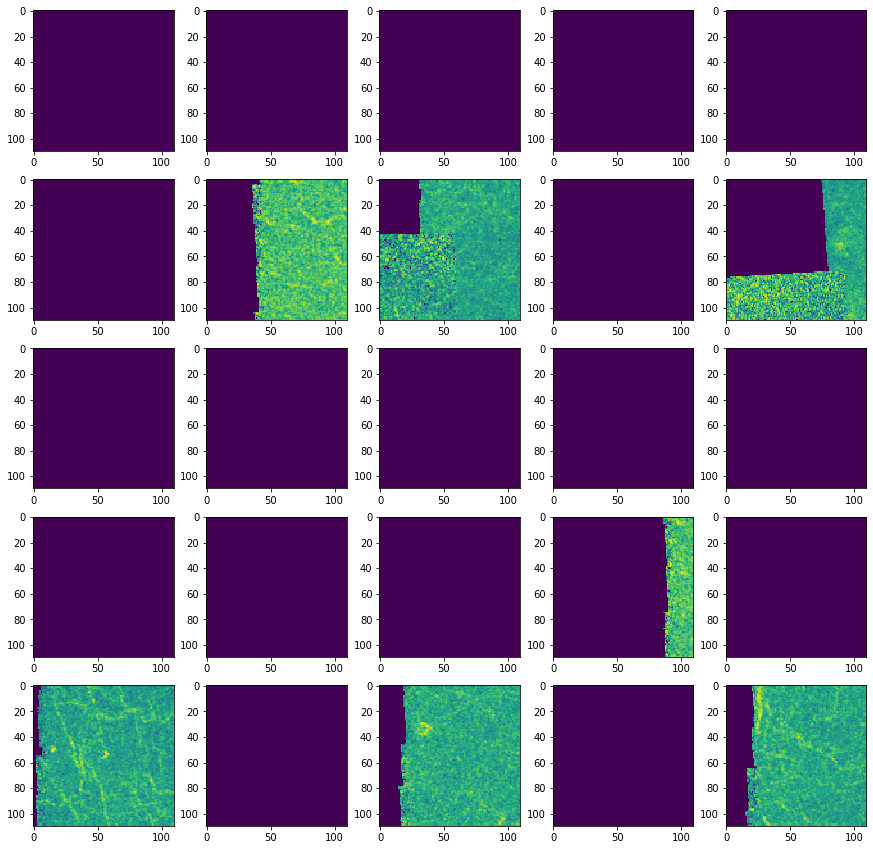

In [29]:
trainCorruptedList = corruptedImages(X_train_copy)

import random
random.shuffle(trainCorruptedList)

f, axarr = plt.subplots(5,5,figsize=(15,15))
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(X_train_copy[trainCorruptedList[i*5+j]])

In [32]:
X_train = pd.read_csv('/content/drive/MyDrive/venus volcanos/Volcanoes_train/train_images.csv')
y_train = pd.read_csv('/content/drive/MyDrive/venus volcanos/Volcanoes_train/train_labels.csv')
X_test = pd.read_csv('/content/drive/MyDrive/venus volcanos/Volcanoes_test/test_images.csv')
y_test = pd.read_csv('/content/drive/MyDrive/venus volcanos/Volcanoes_test/test_labels.csv')

# Fix the column names
XFix(X_train)
XFix(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
def deleteCorrupted(X, y, corruptedIndexList):
    for i in corruptedIndexList:
        X.drop(i, inplace=True) # Drop the corrupted
        y.drop(i, inplace=True) 
    
    X.reset_index(inplace=True) # Reconstruct the index
    X.drop(['index'], axis=1, inplace=True) # Delete old index column
    #Because they are pandas.series we don't need to deal with index
    #Because we use inplace=True we don't need to return something
    
trainCorruptedList = corruptedImages(X_train)
testCorruptedList = corruptedImages(X_test)

deleteCorrupted(X_train, y_train, trainCorruptedList)
deleteCorrupted(X_test, y_test, testCorruptedList)

In [ ]:
print("X_train ->",X_train.shape,"\ny_train ->",y_train.shape,"\nX_test ->",X_test.shape,"\ny_test ->",y_test.shape)

In [ ]:
# Get our label
y_train = y_train["Volcano?"]
y_test = y_test["Volcano?"]

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One Hot Label encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Spliting
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=22)

# Lastly resizing
X_test = np.resize(X_test, (X_test.shape[0], 110, 110, 1))
X_train = np.resize(X_train, (X_train.shape[0], 110, 110, 1))
X_val = np.resize(X_val, (X_val.shape[0], 110, 110, 1))

In [ ]:
print("%70   X_train ->",X_train.shape,"\n      y_train ->",y_train.shape,"\n\n%15   X_test ->",X_test.shape,"\n      y_test ->",y_test.shape,"\n\n%15   X_val ->",X_val.shape,"\n      y_val ->",y_val.shape)

In [ ]:
modelB = Sequential()
modelB.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelB.add(MaxPool2D(pool_size=(2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dense(y_train.shape[1], activation = "sigmoid"))

In [ ]:
modelB.summary()

In [ ]:
modelB.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 20, validation_data = (X_val,y_val))

In [ ]:
scoreB = modelB.evaluate(X_test, y_test)
print('Test Loss ->', scoreB[0])
print('Test Accuracy ->', scoreB[1])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGenerator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=90,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=False,
        vertical_flip=False)
dataGenerator.fit(X_train)

In [ ]:
from tensorflow.keras.initializers import RandomNormal

In [ ]:
modelC = Sequential()
modelC.add(Conv2D(filters = 2, kernel_size = (3,3),padding = 'same',activation ='relu', input_shape = (110,110,1)))
modelC.add(Conv2D(filters = 4, kernel_size = (3,3),padding = 'same',activation ='relu'))
modelC.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'same',activation ='relu'))
modelC.add(MaxPool2D(pool_size=(2,2)))
modelC.add(Dropout(0.5))
modelC.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'same',activation ='relu'))
modelC.add(MaxPool2D(pool_size=(2,2)))
modelC.add(Conv2D(filters = 24, kernel_size = (7,7),padding = 'same',activation ='relu'))
modelC.add(Dropout(0.5))
modelC.add(Flatten())
modelC.add(Dense(y_train.shape[1], activation = "sigmoid"))
# init = RandomNormal(mean=0, stddev=0.1 )
# modelCNN1 = Sequential()
# modelCNN1.add(Conv2D(6, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = ((110, 110, 1))))
# modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
# modelCNN1.add(Dropout(0.5))
# modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
# modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
# modelCNN1.add(Dropout(0.5))
# modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
# modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
# modelCNN1.add(Dropout(0.5))
# modelCNN1.add(Flatten())
# modelCNN1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
modelC.summary()
# modelCNN1.summary()

In [ ]:
modelC.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelC_trained = modelC.fit_generator(dataGenerator.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=[X_val, y_val], steps_per_epoch=X_train.shape[0] // 64)
#modelB_trained = modelB.fit(X_train, y_train, batch_size=64, epochs = 20, validation_data = (X_val,y_val))